link of data used: [kaggle loan approval prediction dataset](https://www.kaggle.com/datasets/sonalisingh1411/loan-approval-prediction)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# load dataset

In [3]:
datapath = '/content/drive/MyDrive/celebal internship/week8/Training Dataset.csv'
datapath2 = '/content/drive/MyDrive/celebal internship/week8/Test Dataset.csv'

df = pd.read_csv(datapath)
df_test = pd.read_csv(datapath2)

target_variable = df["Loan_Status"]

# **understanding data**

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [6]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


# handeling missing data

###finding amount of missing data in each column

In [7]:
max_non_null_val = df["Loan_ID"].count()
print("Percentage of missing values in each column:\n")
missing_percent = []
for col in df.columns:
  missing_percent.append(df[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {df[col].isnull().sum()/max_non_null_val*100:.2f}%")

Percentage of missing values in each column:

Loan_ID : 0.00%
Gender : 2.12%
Married : 0.49%
Dependents : 2.44%
Education : 0.00%
Self_Employed : 5.21%
ApplicantIncome : 0.00%
CoapplicantIncome : 0.00%
LoanAmount : 3.58%
Loan_Amount_Term : 2.28%
Credit_History : 8.14%
Property_Area : 0.00%
Loan_Status : 0.00%


###dropping columns with more than 40% missing values


In [8]:
from operator import indexOf
index_list =[]
for i in missing_percent:
  if(i>40):
    index_list.append(indexOf(missing_percent,i))
df_test.drop(df.columns[index_list],axis=1,inplace=True)
df.drop(df.columns[index_list],axis=1,inplace=True)
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

###classifying columns based on numerical or categorical data

In [9]:
def classify_cols(df , cat_thresh = 15, card_thresh  = 20 ):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique()<cat_thresh]
  cat_but_card_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique()>card_thresh]
  # cat_cols = cat_cols + num_but_cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]
  num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat_cols]
  return cat_cols, num_cols, cat_but_card_cols,num_but_cat_cols

cat_cols, num_cols, cat_but_card_cols, num_but_cat_cols = classify_cols(df)
print(f"cat_cols: {(cat_cols)}")
print(f"num_cols: {(num_cols)}")
print(f"cat_but_car: {(cat_but_card_cols)}")
print(f"num_but_cat_cols: {(num_but_cat_cols)}")

cat_cols: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
num_cols: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
cat_but_car: ['Loan_ID']
num_but_cat_cols: ['Loan_Amount_Term', 'Credit_History']


###Filling missing values in numerical columns with the mean value

In [10]:
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())
  if(col != "Loan_Status"):
    df_test[col] = df_test[col].fillna(df[col].mean())
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

###Filling missing values in categorical columns with mode value

In [11]:
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])
  if(col != "Loan_Status"):
    df_test[col] = df_test[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
for col in num_but_cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])
  df_test[col] = df_test[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
for col in cat_but_card_cols:
  df[col] = df[col].fillna(df[col].mode()[0])
  df_test[col] = df_test[col].fillna(df[col].mode()[0])
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

# Descriptive stats


In [14]:
stats = df.describe()
print(stats)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


# encoding categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

columns_to_encode = cat_cols
columns_to_encode = [col for col in columns_to_encode if col not in cat_but_card_cols and col != "Loan_Status"]

encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder = encoder.fit(df[columns_to_encode])

encoded_categorical_data = encoder.transform(df[columns_to_encode])
encoded_categorical_data_test = encoder.transform(df_test[columns_to_encode])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data,
                                      columns=encoder.get_feature_names_out(columns_to_encode))
encoded_categorical_df_test = pd.DataFrame(encoded_categorical_data_test,
                                      columns=encoder.get_feature_names_out(columns_to_encode))

encoded_categorical_df.index = df.index
encoded_categorical_df_test.index = df_test.index


df.drop(columns=columns_to_encode, inplace=True)
df_test.drop(columns=columns_to_encode , inplace =True)

df = pd.concat([df, encoded_categorical_df], axis=1)
df_test = pd.concat([df_test,encoded_categorical_df_test], axis = 1)

salesPrice = df["Loan_Status"]
df.drop(columns=["Loan_Status"], inplace=True)
df = pd.concat([df, salesPrice], axis=1)

print(df.info(10))
print(df_test.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Male              614 non-null    float64
 7   Married_Yes              614 non-null    float64
 8   Dependents_1             614 non-null    float64
 9   Dependents_2             614 non-null    float64
 10  Dependents_3+            614 non-null    float64
 11  Education_Not Graduate   614 non-null    float64
 12  Self_Employed_Yes        614 non-null    float64
 13  Property_Area_Semiurban  614 non-null    float64
 14  Property_Area_Urban      6

###Encoding the Target column

In [16]:
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})
df["Loan_Status"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#correlation matrix of dataframe after encoding


In [17]:
df.drop(columns = cat_but_card_cols, inplace=True)
df_test.drop(columns = cat_but_card_cols, inplace = True)

In [18]:
df_corr = df.corr()
df_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.058809,0.051708,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.082912,0.075948,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431,0.107930,0.147141,0.062359,0.019547,0.153200,-0.166998,0.115260,-0.008273,-0.033220,-0.036416
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.074030,-0.100912,-0.088492,-0.010609,-0.077273,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.009170,0.010938,0.009757,0.007987,-0.060473,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.058809,0.082912,0.107930,-0.074030,0.009170,1.000000,0.364569,-0.004466,0.129953,0.096319,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.051708,0.075948,0.147141,-0.100912,0.010938,0.364569,1.000000,0.113853,0.249547,0.132566,0.012304,0.004489,0.005845,0.000546,0.091478
Dependents_1,0.040861,-0.029769,0.062359,-0.088492,0.009757,-0.004466,0.113853,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320,-0.038740
Dependents_2,-0.034650,0.010016,0.019547,-0.010609,0.007987,0.129953,0.249547,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569,0.062384
Dependents_3+,0.156687,0.041491,0.153200,-0.077273,-0.060473,0.096319,0.132566,-0.134337,-0.133547,1.000000,0.055288,0.003278,0.007863,-0.047460,-0.026123


# dropping columns with less than 1% correlation

In [19]:
corr_coef_with_target_value = df_corr["Loan_Status"].values
indexes_with_lessthan_1_corr = []
for i in corr_coef_with_target_value:
  if (abs(i)<0.01):
    indexes_with_lessthan_1_corr.append(indexOf(corr_coef_with_target_value,i))
df.drop(df.columns[indexes_with_lessthan_1_corr], axis=1,inplace=True)
df_test.drop(df_test.columns[indexes_with_lessthan_1_corr], axis =1, inplace = True)
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CoapplicantIncome        614 non-null    float64
 1   LoanAmount               614 non-null    float64
 2   Loan_Amount_Term         614 non-null    float64
 3   Credit_History           614 non-null    float64
 4   Gender_Male              614 non-null    float64
 5   Married_Yes              614 non-null    float64
 6   Dependents_1             614 non-null    float64
 7   Dependents_2             614 non-null    float64
 8   Dependents_3+            614 non-null    float64
 9   Education_Not Graduate   614 non-null    float64
 10  Property_Area_Semiurban  614 non-null    float64
 11  Property_Area_Urban      614 non-null    float64
 12  Loan_Status              614 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 62.5 KB
<class 'pandas.core.frame.DataFra

# Splitting training data into training and testing datasets

In [20]:
y = df['Loan_Status']
df_X = df.drop(columns=['Loan_Status'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.25, random_state = 0)


#Data scaling

In [22]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# df_test = sc.transform(df_test)

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# df_test = scaler.transform(df_test)


In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_test = scaler.transform(df_test)


#Trainnig Logistic regression model



In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20  23]
 [  2 109]]


0.8376623376623377

###Testing model for overfitting

In [27]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 64  85]
 [  5 306]]


0.8043478260869565

###Grid search






In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.65 %
Best Parameters: {'C': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


###building model with best parameters

In [29]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20  23]
 [  2 109]]


0.8376623376623377

In [30]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

#Training a knn model




In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 23  20]
 [ 11 100]]


0.7987012987012987

###testing for overfiting

In [33]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 71  78]
 [ 16 295]]


0.7956521739130434

###Grid search

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': list(range(1, 32)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.26 %
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}


###building model with best parameters

In [35]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 10  33]
 [  2 109]]


0.7727272727272727

In [36]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

#Training a Descision Tree model

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22 21]
 [27 84]]


0.6883116883116883

###Grid search


In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 74.57 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


###building model with best parameters

In [40]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23 20]
 [20 91]]


0.7402597402597403

In [41]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

#XG boost model

In [42]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25 18]
 [14 97]]


0.7922077922077922

###Hyperparam tuning with optuna

In [44]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [45]:

import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    y_pred = xgb_model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)


[I 2024-07-29 19:51:59,568] A new study created in memory with name: no-name-524c27f1-e820-44ed-be05-2caf0a8e5a65
[I 2024-07-29 19:51:59,731] Trial 0 finished with value: 0.18181818181818177 and parameters: {'learning_rate': 0.07989082539859456, 'max_depth': 5, 'n_estimators': 194, 'colsample_bytree': 0.7180514209884439, 'subsample': 0.7326320262138817}. Best is trial 0 with value: 0.18181818181818177.
[I 2024-07-29 19:51:59,913] Trial 1 finished with value: 0.16883116883116878 and parameters: {'learning_rate': 0.010965424555479776, 'max_depth': 9, 'n_estimators': 148, 'colsample_bytree': 0.8952385468687183, 'subsample': 0.5374672624736101}. Best is trial 1 with value: 0.16883116883116878.
[I 2024-07-29 19:52:00,138] Trial 2 finished with value: 0.18181818181818177 and parameters: {'learning_rate': 0.0214368058603161, 'max_depth': 10, 'n_estimators': 122, 'colsample_bytree': 0.9349793097124239, 'subsample': 0.7164252540986632}. Best is trial 1 with value: 0.16883116883116878.
[I 2024-0

Best hyperparameters:  {'learning_rate': 0.05464658114909055, 'max_depth': 4, 'n_estimators': 158, 'colsample_bytree': 0.7999514769465474, 'subsample': 0.7252561597947103}


###building model with best parameters

In [46]:
model = xgb.XGBClassifier(**study.best_params)

model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 22  21]
 [  3 108]]


0.8441558441558441

###test for overfitting

In [47]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)

[[ 96  53]
 [  7 304]]


0.8695652173913043

In [48]:
y_pred_test = model.predict(df_test)

#Training a random forest model

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 22  21]
 [  8 103]]


0.8116883116883117

###Get most important features

<Axes: >

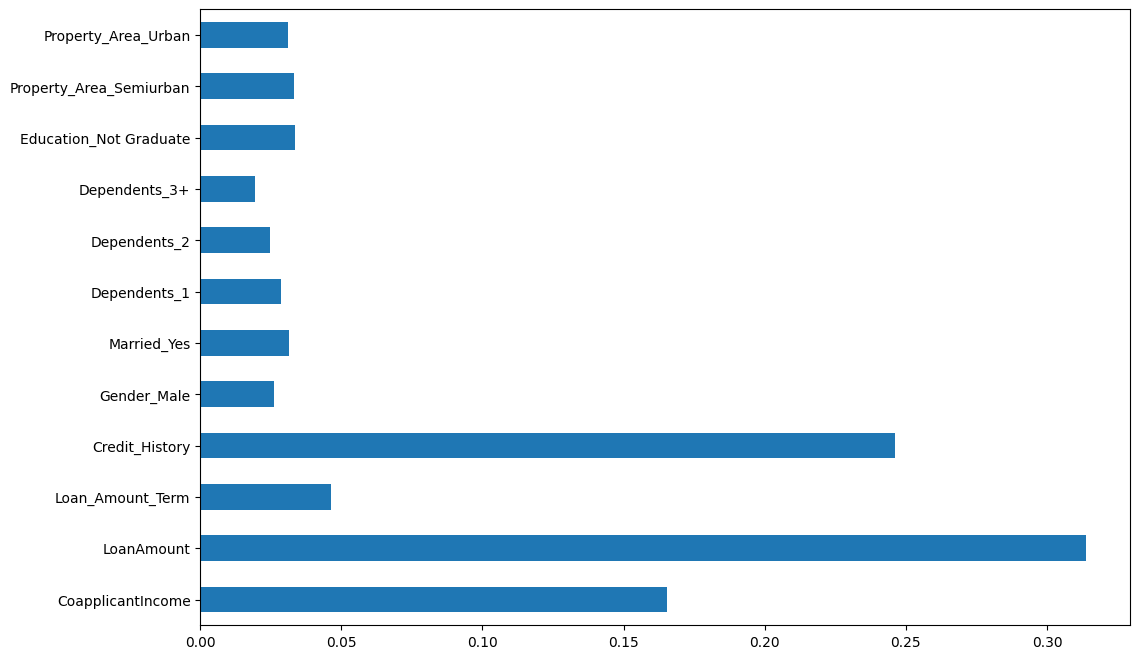

In [51]:
importances = classifier.feature_importances_
df_importances = pd.Series(importances, index = df_X.columns)
indices = np.argsort(importances)[::-1]
features = df_X.columns
features
df_importances.plot(kind='barh', figsize=(12,8))

###Grid search

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features':['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.78 %
Best Parameters: {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


###building model with best parameters

In [54]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 19  24]
 [  3 108]]


0.8246753246753247

In [55]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

#Training a svm model

In [56]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 110)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=110)

###test for overfitting

In [57]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 63  86]
 [  5 306]]


0.8021739130434783

###Grid search

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'kernel': ['linear'],
    'gamma': [0,0.1, 0.5, 1, 2, 5]
}

grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 3,n_jobs = -1,verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Accuracy: 80.21 %
Best Parameters: {'C': 0.25, 'gamma': 0, 'kernel': 'linear'}


In [61]:
y_pred = best_base_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 19  24]
 [  2 109]]
Accuracy Score:
0.8311688311688312


###model bagging


In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

clf = BaggingClassifier(random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose =2)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Confusion Matrix:
[[ 18  25]
 [  2 109]]
Accuracy Score:
0.8246753246753247


In [63]:
y_pred_test = best_clf.predict(df_test)
y_pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

# Training naive bayes model

In [64]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20  23]
 [  3 108]]


0.8311688311688312

###test for overfitting

In [66]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 66  83]
 [ 10 301]]


0.7978260869565217

#Training extra trees model

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)


ExtraTreesClassifier(random_state=0)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21 22]
 [16 95]]


0.7532467532467533

#building an ANN

In [69]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

size_input_layer = X_train.shape[1]
size_hidden_layer = (2*size_input_layer // 3) + 2

model = Sequential([
    Dense(units=size_hidden_layer, input_shape=(size_input_layer,), activation='relu'),

    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [70]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=3,
    epochs=100,
    validation_split = 0.1,
    shuffle=True,
    verbose=2
)

Epoch 1/100
138/138 - 3s - loss: 3.4311 - accuracy: 0.4710 - val_loss: 0.9088 - val_accuracy: 0.4348 - 3s/epoch - 22ms/step
Epoch 2/100
138/138 - 1s - loss: 0.9697 - accuracy: 0.5700 - val_loss: 0.6731 - val_accuracy: 0.5652 - 595ms/epoch - 4ms/step
Epoch 3/100
138/138 - 0s - loss: 0.7221 - accuracy: 0.6884 - val_loss: 0.6447 - val_accuracy: 0.6522 - 486ms/epoch - 4ms/step
Epoch 4/100
138/138 - 0s - loss: 0.6246 - accuracy: 0.7101 - val_loss: 0.6376 - val_accuracy: 0.6522 - 415ms/epoch - 3ms/step
Epoch 5/100
138/138 - 0s - loss: 0.5992 - accuracy: 0.7319 - val_loss: 0.6209 - val_accuracy: 0.6739 - 400ms/epoch - 3ms/step
Epoch 6/100
138/138 - 0s - loss: 0.5962 - accuracy: 0.7101 - val_loss: 0.6038 - val_accuracy: 0.6957 - 245ms/epoch - 2ms/step
Epoch 7/100
138/138 - 0s - loss: 0.5709 - accuracy: 0.7440 - val_loss: 0.6398 - val_accuracy: 0.6739 - 237ms/epoch - 2ms/step
Epoch 8/100
138/138 - 0s - loss: 0.5720 - accuracy: 0.7319 - val_loss: 0.6091 - val_accuracy: 0.6957 - 239ms/epoch - 2ms

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

5/5 [==============================] - 0s 3ms/step
[[ 21  22]
 [  3 108]]


0.8376623376623377

In [72]:
y_pred_test = model.predict(df_test)
y_pred_test = (y_pred_test >= 0.5).astype(int)
y_pred_test

12/12 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    